In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [25]:
p = 1
pdmp = pd.read_csv("newer_sas/trainmainfull.csv",
                   header=0, 
                   skiprows=lambda i: i>0 and random.random() > p)

In [6]:
pdmp.head()

,common_id,sum_hydrocodone,sum_oxycodone,sum_tramadol,sum_codeine,sum_propoxyphene,sum_meperidine,sum_hydromorphone,sum_morphine,sum_fentanyl,...,zip722,zip723,zip724,zip725,zip726,zip727,zip728,zip729,male,avgmme_gt50
0,05c224c0-b8cf-11e7-951a-024228cca67d,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,255341e0-b913-11e7-951a-024228cca67d,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
2,2cc3a900-b8d3-11e7-951a-024228cca67d,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,NaN
3,362787a0-b8d3-11e7-951a-024228cca67d,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,3c097500-b8df-11e7-951a-024228cca67d,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [7]:
pdmp.dtypes

common_id           object
sum_hydrocodone      int64
sum_oxycodone        int64
sum_tramadol         int64
sum_codeine          int64
                    ...   
zip727               int64
zip728               int64
zip729               int64
male                 int64
avgmme_gt50        float64
Length: 87, dtype: object

In [8]:
pdmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13142 entries, 0 to 13141
Data columns (total 87 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   common_id               13142 non-null  object 
 1   sum_hydrocodone         13142 non-null  int64  
 2   sum_oxycodone           13142 non-null  int64  
 3   sum_tramadol            13142 non-null  int64  
 4   sum_codeine             13142 non-null  int64  
 5   sum_propoxyphene        13142 non-null  int64  
 6   sum_meperidine          13142 non-null  int64  
 7   sum_hydromorphone       13142 non-null  int64  
 8   sum_morphine            13142 non-null  int64  
 9   sum_fentanyl            13142 non-null  int64  
 10  sum_tapentadol          13142 non-null  int64  
 11  sum_partial             13142 non-null  int64  
 12  sum_semi                13142 non-null  int64  
 13  sum_methadone           13142 non-null  int64  
 14  sum_buprenorphine       13142 non-null

<AxesSubplot:>

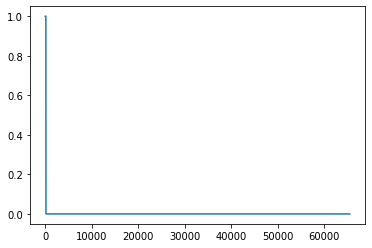

In [20]:
pdmp['ovdose'].astype('object').plot()

In [27]:
pdmp['sum_hydrocodone'].astype('object').value_counts()

0     769340
1     297177
3     107992
2      96135
4      22420
5       6485
6       3764
7       1392
8        685
9        406
10       221
11       121
12        94
13        60
14        38
15        22
16        12
17         8
18         8
19         5
20         5
22         5
21         3
23         3
24         1
27         1
28         1
31         1
47         1
Name: sum_hydrocodone, dtype: int64

In [15]:
pdmp.loc[2684]

AttributeError: 'Series' object has no attribute 'overdose'

In [26]:
pdmp['ovdose'].astype('object').value_counts()

0    1303976
1       2430
Name: ovdose, dtype: int64

In [37]:
df = pd.DataFrame(pdmp)
odoses = df[df.ovdose == 1]

In [42]:
odose_mean = odoses.mean()

In [39]:
df[df.date.between('2017-01-01', '2017-12-31')]

AttributeError: 'DataFrame' object has no attribute 'date'

In [13]:
df2017 = df[df.date.between('2014-01-01', '2017-12-31')]

In [14]:
df2017

,written_at,patient_postal_code3,Class,date,quarter
0,2014-03-17,723.0,Stimulant,2014-03-17,2014Q1
1,2014-01-18,723.0,Stimulant,2014-01-18,2014Q1
2,2016-05-13,723.0,Stimulant,2016-05-13,2016Q2
3,2016-03-14,723.0,Stimulant,2016-03-14,2016Q1
4,2016-02-09,723.0,Stimulant,2016-02-09,2016Q1
...,...,...,...,...,...
28998302,2015-03-16,722.0,Stimulant,2015-03-16,2015Q1
28998303,2014-11-25,722.0,Stimulant,2014-11-25,2014Q4
28998304,2014-07-22,722.0,Stimulant,2014-07-22,2014Q3
28998305,2014-02-21,722.0,Stimulant,2014-02-21,2014Q1


In [15]:
df_counts = df2017.pivot_table(index=['quarter'],
                               columns=['Class'],
                               values=['written_at'], aggfunc='count')

<AxesSubplot:xlabel='quarter'>

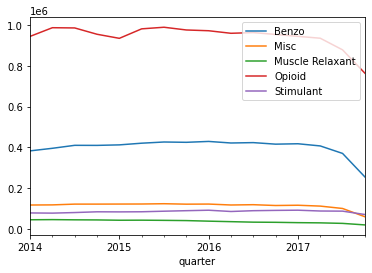

In [16]:
df_counts.columns = [x[1] for x in df_counts.columns]
df_counts.plot()

In [48]:
odose_mean.to_json('features.json', orient='table', indent=2)

In [18]:
df_counts

,Benzo,Misc,Muscle Relaxant,Opioid,Stimulant
quarter,,,,,
2014Q1,382776,116952,44542,944841,78086
2014Q2,395445,117596,45266,987419,77120
2014Q3,410005,121356,44277,986277,79992
2014Q4,409708,121383,43721,955239,83647
2015Q1,412202,121660,42233,935275,83224
2015Q2,420470,121908,42507,981840,83820
2015Q3,426306,123327,41657,989706,86585
2015Q4,424796,121129,40526,976304,89118
2016Q1,429133,121591,37707,972564,91398
